<a href="https://colab.research.google.com/github/sklearner26/Bank-loan-risk-prediction/blob/main/Loan_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing all dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/drive/MyDrive/loan_approval_dataset.csv')

In [ ]:
df.shape

(252000, 13)

In [3]:
df.drop('Id',inplace=True,axis=1)

#**Dataset Visualization**

In [ ]:
df.sample(10)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
169683,0.750302,48,5,single,rented,no,Financial_Analyst,New_Delhi,Delhi,5,10,0
232873,0.793822,38,16,single,rented,no,Artist,Kolhapur,Maharashtra,14,14,0
80859,0.420361,50,1,single,rented,no,Petroleum_Engineer,Varanasi,Uttar_Pradesh,1,14,1
8032,0.310855,35,14,single,rented,yes,Technician,Guna,Madhya_Pradesh,14,10,1
116613,0.057256,64,14,single,rented,no,Dentist,Karnal,Haryana,3,13,0
93418,0.974381,44,0,single,rented,yes,Web_designer,Dhule,Maharashtra,0,10,0
68485,0.892762,38,15,single,rented,no,Chemical_engineer,Saharsa[29],Bihar,3,10,1
76030,0.891300,77,18,single,rented,yes,Economist,Delhi_city,Delhi,10,11,0
4086,0.130615,62,5,single,rented,no,Police_officer,Hajipur[31],Bihar,5,12,1
110778,0.646368,65,13,single,rented,yes,Architect,Morena,Madhya_Pradesh,11,12,1


In [ ]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,49.954071,10.084437,6.333877,11.997794,0.123000
std,0.288130,17.063855,6.002590,3.647053,1.399037,0.328438
min,0.000000,21.000000,0.000000,0.000000,10.000000,0.000000
25%,0.249529,35.000000,5.000000,3.000000,11.000000,0.000000
50%,0.499557,50.000000,10.000000,6.000000,12.000000,0.000000
75%,0.747495,65.000000,15.000000,9.000000,13.000000,0.000000
max,1.000000,79.000000,20.000000,14.000000,14.000000,1.000000


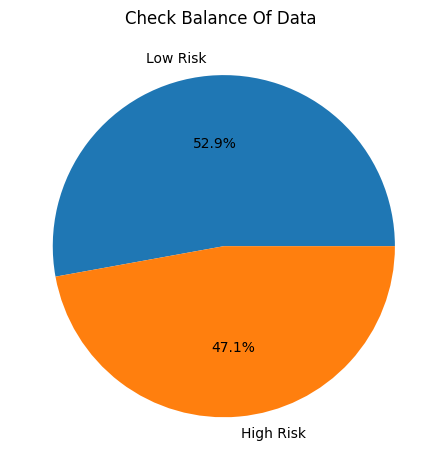

In [ ]:
plt.pie(df['Risk_Flag'].value_counts(),labels=['Low Risk','High Risk'],autopct='%1.1f%%')
plt.title("Check Balance Of Data ")
plt.tight_layout()
plt.show()

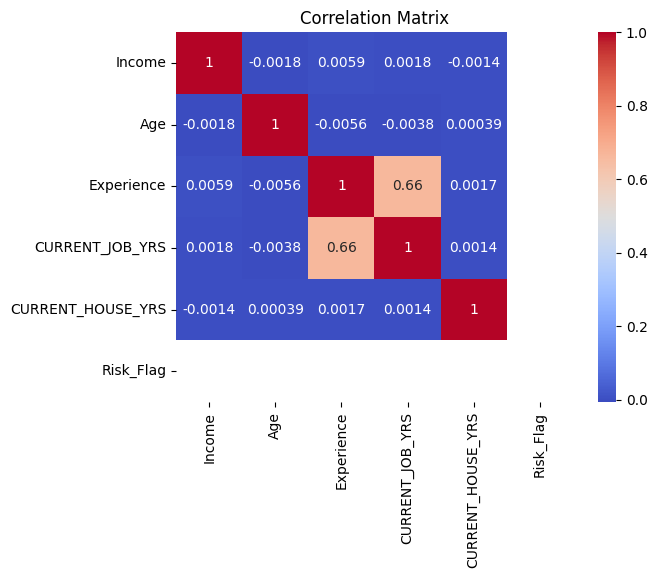

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df2=df.select_dtypes(include='object')

In [ ]:
l=[]
for col in df2.columns:
  l.append(df2[col].nunique())
l

[2, 3, 2, 51, 317, 29]

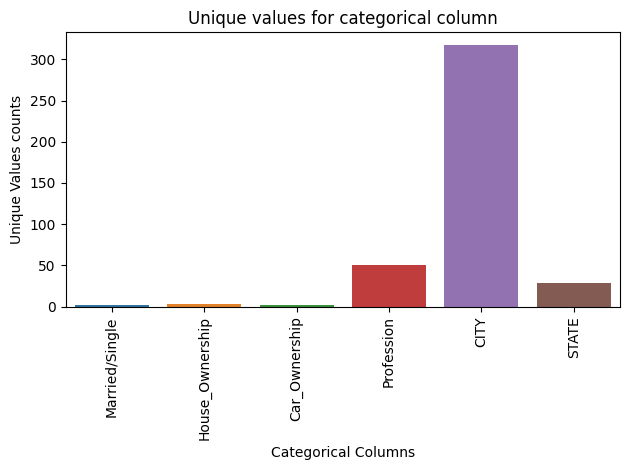

In [ ]:
sns.barplot(x=df2.columns,y=l,hue=df2.columns)
plt.title("Unique values for categorical column")
plt.xticks(rotation=90)
plt.xlabel('Categorical Columns')
plt.ylabel('Unique Values counts')
plt.tight_layout()
plt.show()

#**DATASET EXPLORATION**

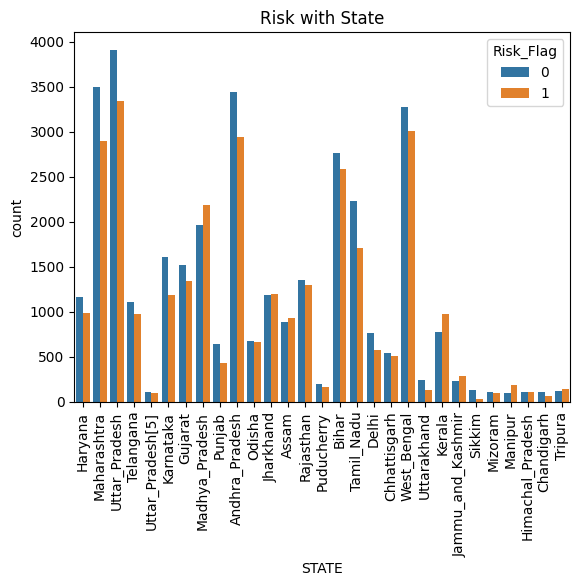

In [ ]:
sns.countplot(data=finaldata,x='STATE',hue='Risk_Flag')
plt.title("Risk with State")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#droping unusual features
df.drop(columns=['Id'],axis=1,inplace=True)

In [ ]:
def plot_duplicate(df):
  df.duplicated().value_counts().plot(kind='bar')
  plt.show()

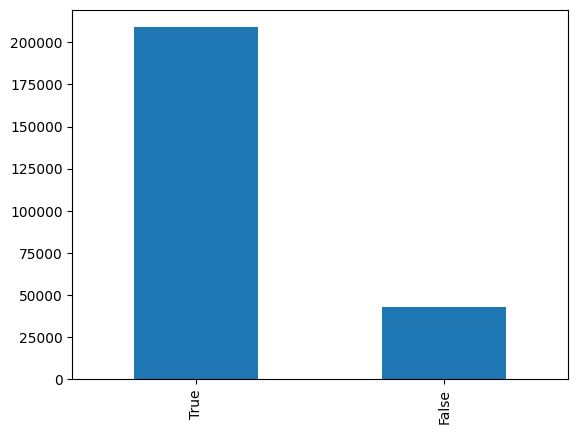

In [ ]:
plot_duplicate(df) #Found huge duplicate data

In [ ]:
#Removing duplicacy
print("Shape before droping",df.shape)
df.drop_duplicates(inplace=True)
print("Shape after droping",df.shape)

Shape before droping (252000, 12)
Shape after droping (43190, 12)


In [ ]:
df.isnull( ).sum() #No missing value present

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

#comparing having risk with all features

In [ ]:
df1=df[df['Risk_Flag']==1] #selecting data having risk

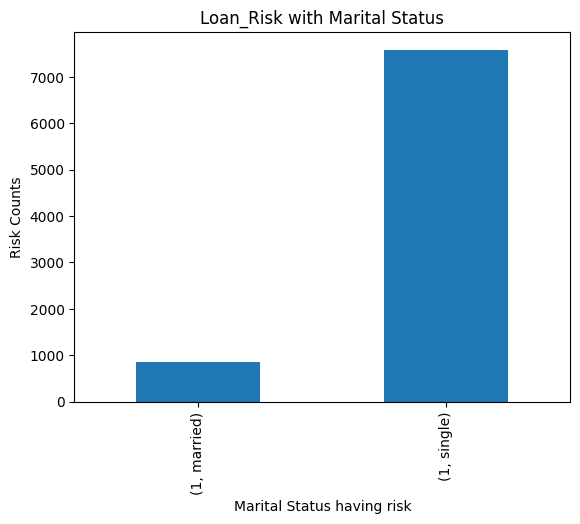

In [ ]:
#checking loan risk with marital status
df1.groupby(['Risk_Flag','Married/Single']).size().plot(kind='bar')
plt.xlabel('Marital Status having risk')
plt.ylabel('Risk Counts')          #singles have high loan risk
plt.title('Loan_Risk with Marital Status')
plt.show()

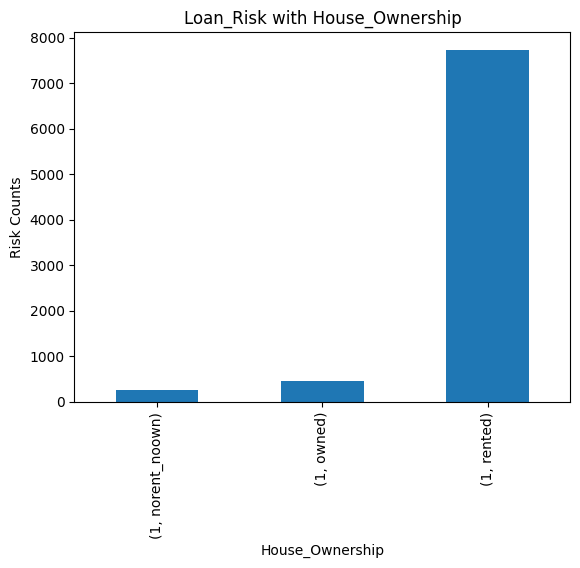

In [ ]:
#checking loan risk with house ownership
df1.groupby(['Risk_Flag','House_Ownership']).size().plot(kind='bar')
plt.xlabel('House_Ownership')
plt.ylabel('Risk Counts')
plt.title('Loan_Risk with House_Ownership')         #Rented house owner have high loan risk
plt.show()

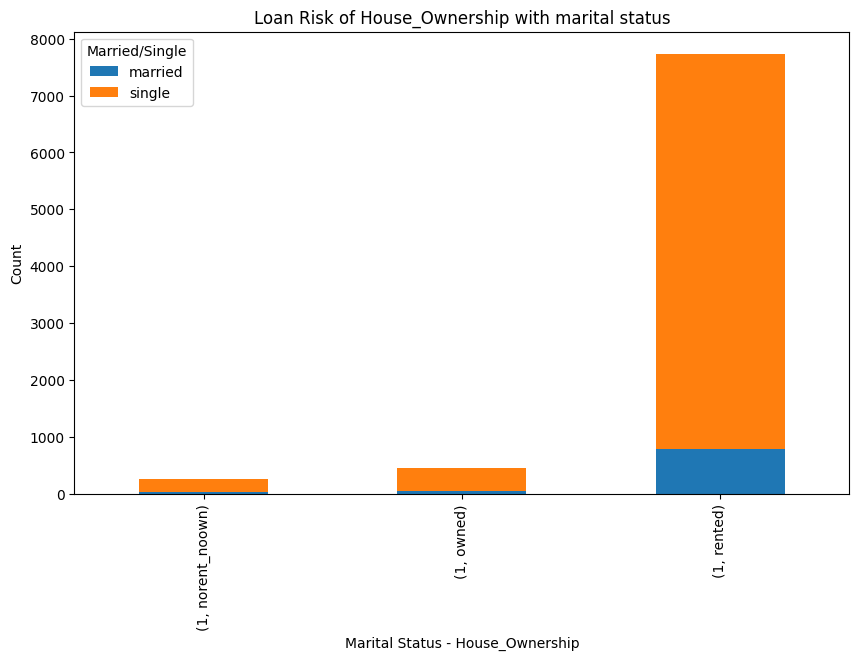

In [ ]:
grouped = df1.groupby(['Risk_Flag', 'House_Ownership','Married/Single']).size().unstack()
ax = grouped.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Loan Risk of House_Ownership with marital status')
plt.xlabel('Marital Status - House_Ownership')
plt.ylabel('Count')                                       #same previous observe single and rented have high loan risk
plt.show()



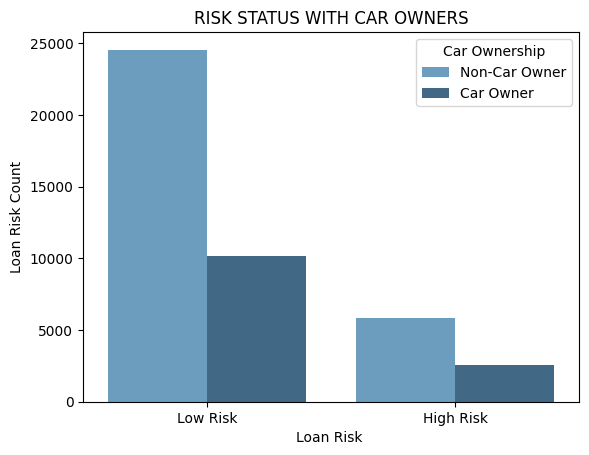

In [ ]:
hue_labels = { 'No': 'Non-Car Owner','Yes': 'Car Owner'}
sns.countplot(x='Risk_Flag', data=df, palette="Blues_d", hue='Car_Ownership')
plt.xlabel('Loan Risk ')
plt.ylabel('Loan Risk Count')
plt.xticks(ticks=[0, 1], labels=['Low Risk', 'High Risk'])            #Observe non car_Owner have low loan risk
plt.title("RISK STATUS WITH CAR OWNERS")
plt.legend(title='Car Ownership', labels=hue_labels.values(), loc='upper right')
plt.show()

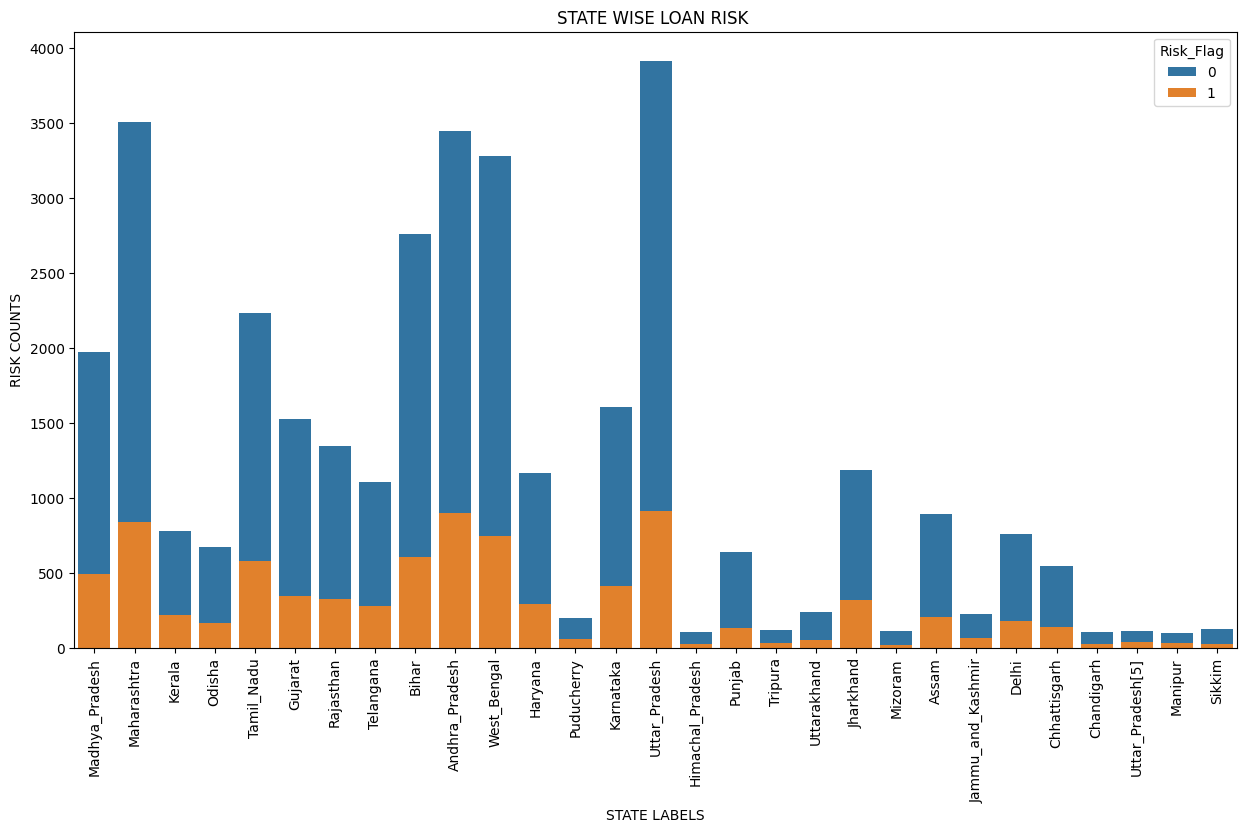

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='STATE', y='Risk_Flag', data=df, estimator=len, hue='Risk_Flag', dodge=False)
plt.xlabel('STATE LABELS')
plt.title("STATE WISE LOAN RISK ")
plt.ylabel('RISK COUNTS')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Changing name of Uttarpradesh[5] to uttarpradesh
df['STATE'] = df['STATE'].replace('Uttar_Pradesh[5]', 'Uttar_Pradesh')

In [ ]:
grouped_name=df.groupby('STATE')['CITY'].nunique().sort_values().index
grouped_val=df.groupby('STATE')['CITY'].nunique().sort_values().values

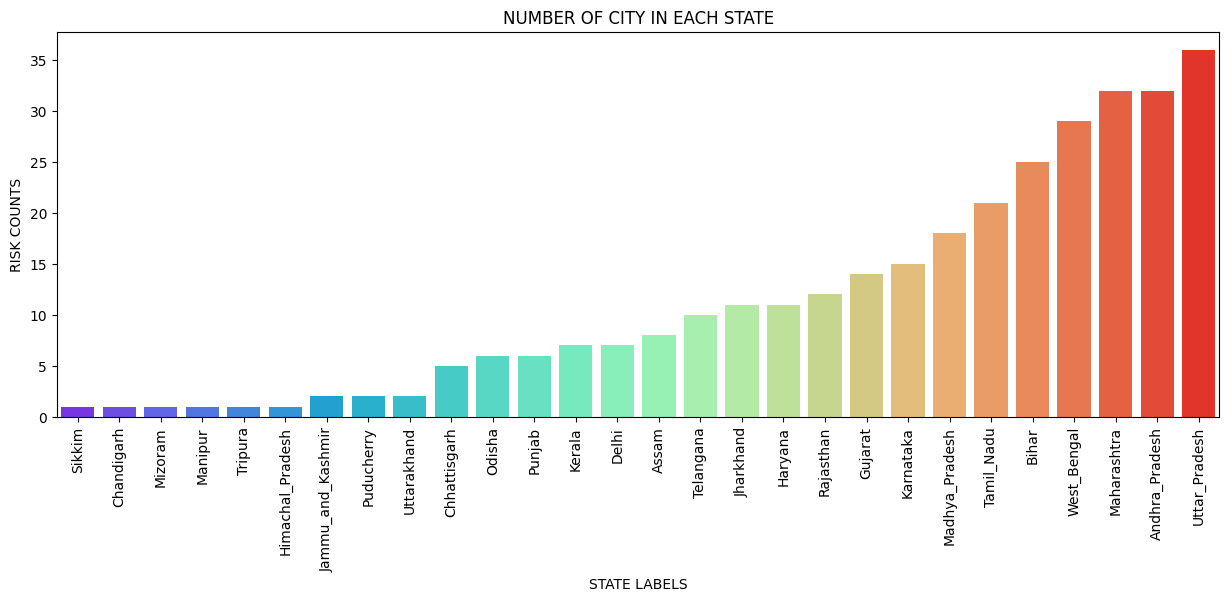

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=grouped_name,y=grouped_val,palette="rainbow",hue=grouped_name)
plt.xlabel('STATE LABELS')
plt.title("NUMBER OF CITY IN EACH STATE")
plt.ylabel('RISK COUNTS')
plt.xticks(rotation=90)
plt.show()

##observing city wise risk

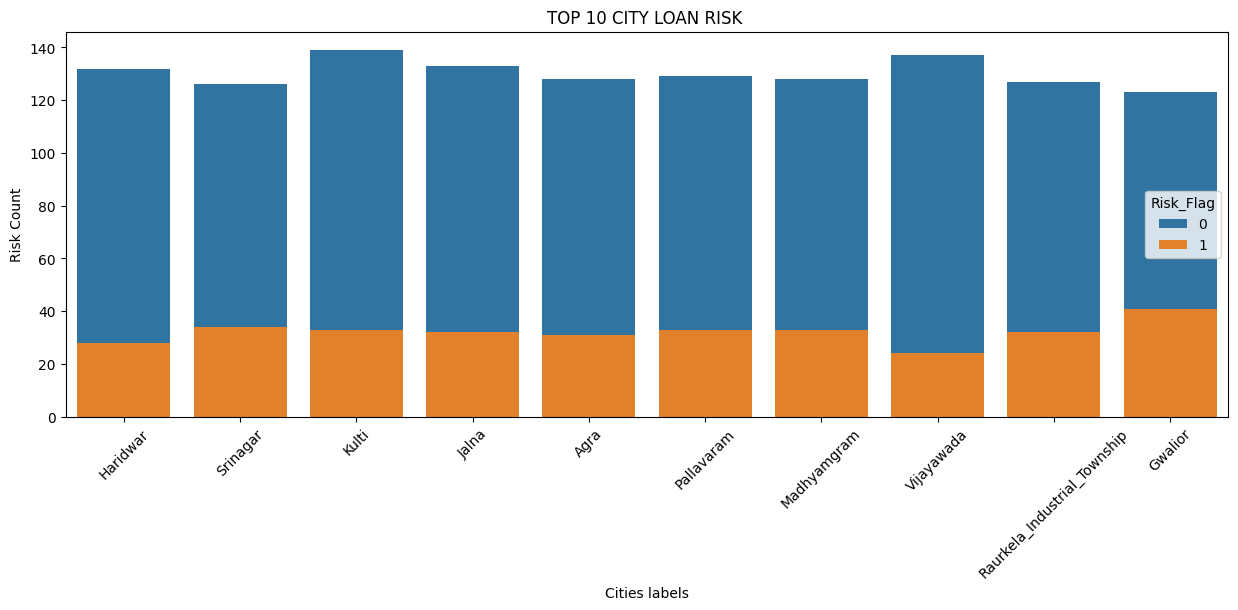

In [ ]:
plt.figure(figsize=(15,5))
city_counts = df['CITY'].value_counts()

# Create a DataFrame for plotting with the top 10 cities
top_cities_df = df[df['CITY'].isin(city_counts.index[:10])]

sns.barplot(x='CITY', y='Risk_Flag', data=top_cities_df, estimator=len, hue='Risk_Flag', dodge=False)
plt.xlabel('Cities labels')
plt.title("TOP 10 CITY LOAN RISK ")
plt.ylabel('Risk Count')
plt.xticks(rotation=45)
plt.show()

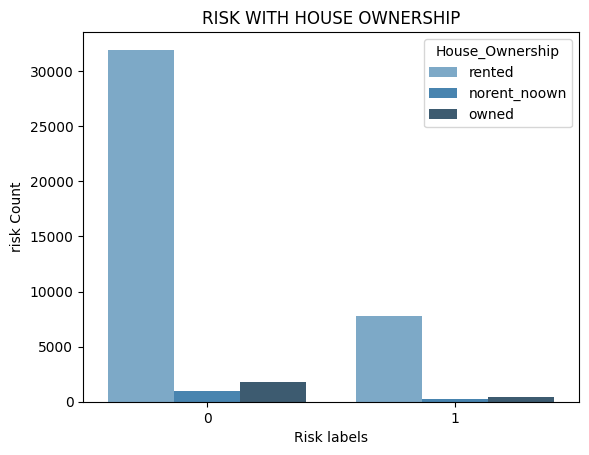

In [ ]:
sns.countplot(x='Risk_Flag', data=df, palette="Blues_d", hue='House_Ownership')
plt.xlabel('Risk labels')
plt.title("RISK WITH HOUSE OWNERSHIP")
plt.ylabel('risk Count')         #Observe that  car owner have low loan risk
plt.show()

In [ ]:
df1.groupby(['Risk_Flag','Married/Single']).size()

Risk_Flag  Married/Single
1          married            859
           single            7584
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

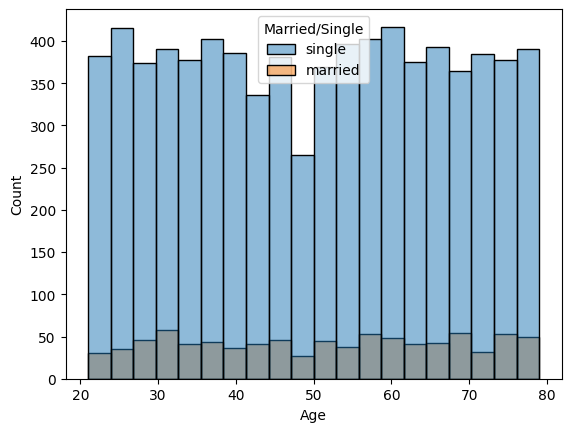

In [ ]:
sns.histplot(data=df1,x='Age',hue='Married/Single')  #Concluded that single have low risk

In [ ]:
#normalise income
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Income']=scaler.fit_transform(df[['Income']])

In [ ]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

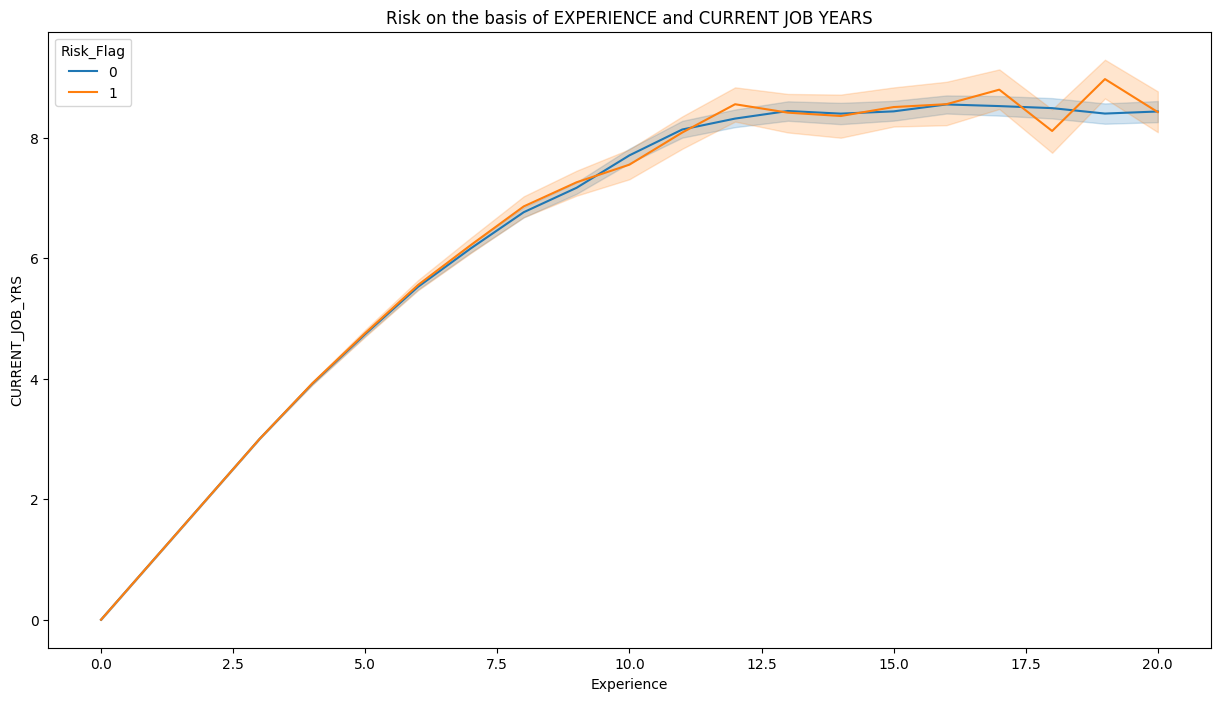

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="Experience", y="CURRENT_JOB_YRS",hue='Risk_Flag')
plt.title("Risk on the basis of EXPERIENCE and CURRENT JOB YEARS")
plt.show()

<Axes: xlabel='CURRENT_JOB_YRS', ylabel='CURRENT_HOUSE_YRS'>

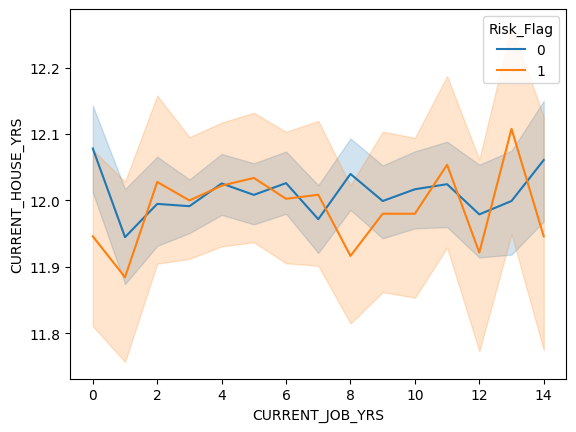

In [ ]:
sns.lineplot(data=df, x="CURRENT_JOB_YRS", y="CURRENT_HOUSE_YRS",hue='Risk_Flag')

In [ ]:
name1=df.groupby(['STATE',df[df['Risk_Flag']==1]['Risk_Flag']]).size().sort_values(ascending=False).index
val1=df.groupby(['STATE',df[df['Risk_Flag']==1]['Risk_Flag']]).size().sort_values(ascending=False).values


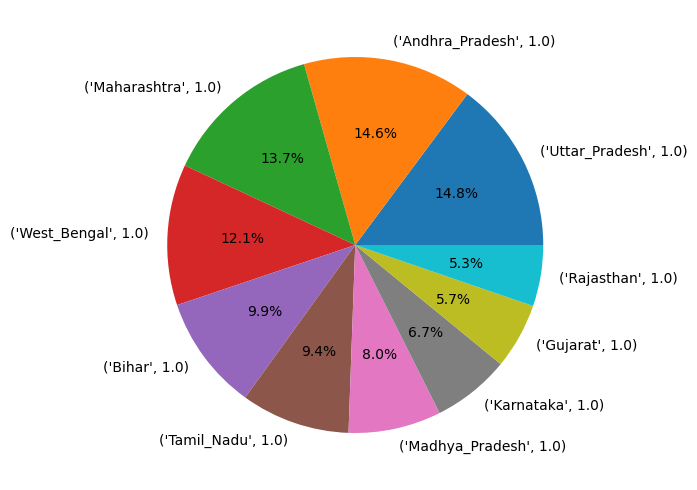

In [ ]:
#High risk for top ten state
plt.figure(figsize=(15,5))
plt.pie(val1[:10],labels=name1[:10],autopct='%1.1f%%')
plt.title("High Risk for top ten state")
plt.tight_layout()
plt.show()

In [7]:
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

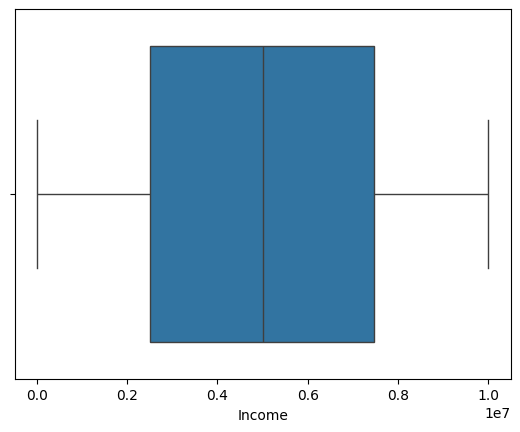

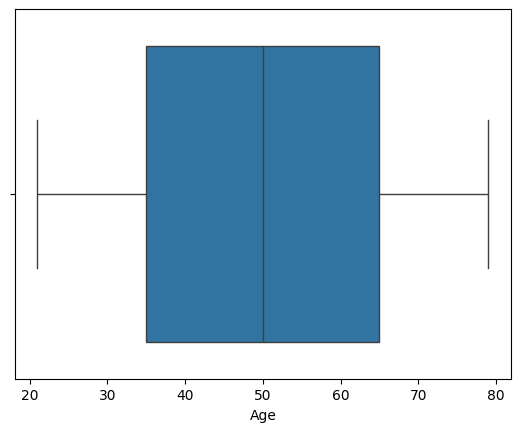

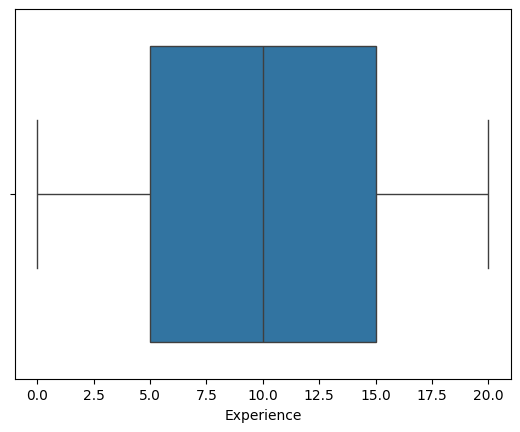

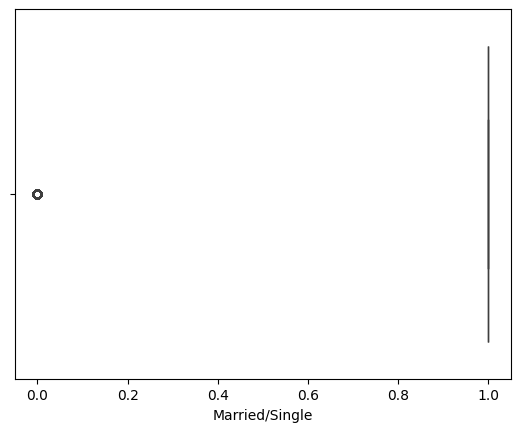

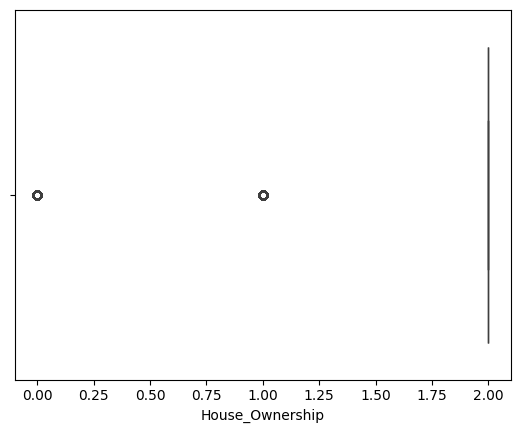

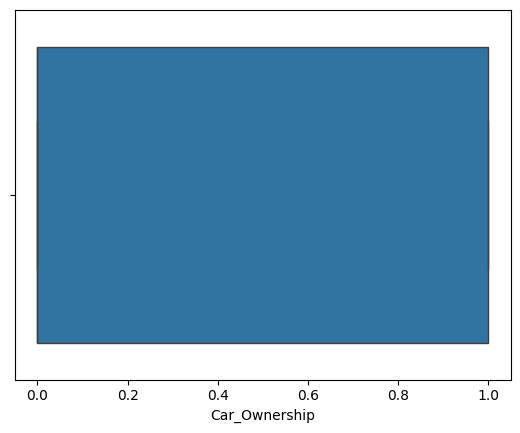

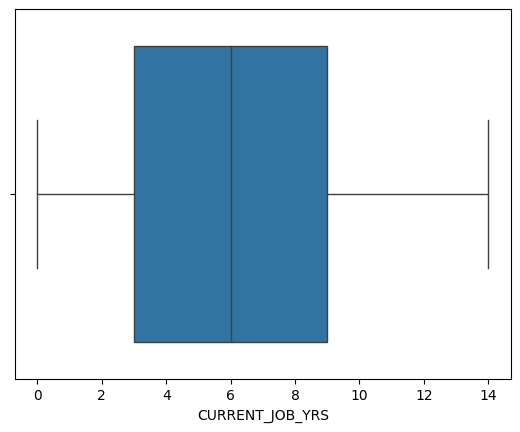

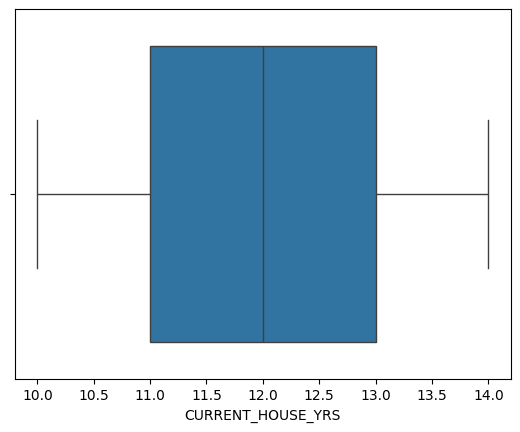

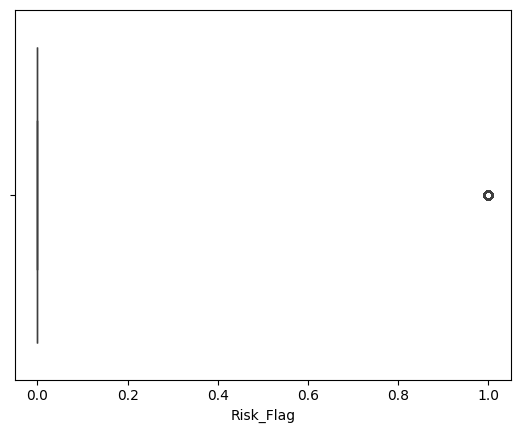

In [8]:
#make a boxplot
for i in range(len(num_col)):
 sns.boxplot(data=df,x=num_col[i])   #Observe no outlier present in dataset
 plt.show()


In [ ]:
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['Married/Single', 'House_Ownership', 'Car_Ownership'], dtype='object')

In [4]:
df.drop(['Profession','CITY','STATE'],inplace=True,axis=1)

In [11]:
#Applying encoding to dataset
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=df[col].astype('category')
    df[col]=df[col].cat.codes

In [ ]:
#find unique value of categdata
for i in cat_col:
  print(i,':-',df[i].unique())
  print("-"*50)

Married/Single :- [1 0]
--------------------------------------------------
House_Ownership :- [2 1 0]
--------------------------------------------------
Car_Ownership :- [0 1]
--------------------------------------------------


In [8]:
!pip install catboost

#**MODEL BUILDING**

In [6]:
#Importing all classification model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [7]:
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,cohen_kappa_score,confusion_matrix,classification_report

In [12]:
x=df.drop(columns=['Risk_Flag'])
y=df['Risk_Flag']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [ ]:

#ALL models fitting detail
'''
RandomForestClassifier cross-validation accuracy: 0.899
Best classifier: RandomForestClassifier
Test set accuracy: 0.896

DecisionTreeClassifier cross-validation accuracy: 0.882
Best classifier: DecisionTreeClassifier
Test set accuracy: 0.879

KNeighborsClassifier cross-validation accuracy: 0.889
Best classifier: KNeighborsClassifier
Test set accuracy: 0.889

GaussianNB cross-validation accuracy: 0.877
Best classifier: GaussianNB
Test set accuracy: 0.877

GradientBoostingClassifier cross-validation accuracy: 0.877
Best classifier: GradientBoostingClassifier
Test set accuracy: 0.877

XGBClassifier cross-validation accuracy: 0.886
Best classifier: XGBClassifier
Test set accuracy: 0.885

CatBoostClassifier cross-validation accuracy: 0.885
Best classifier: CatBoostClassifier
Test set accuracy: 0.884
'''

In [22]:
# Define a list of classifiers
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(verbose=0),
    RandomForestClassifier()

]

# Iterate over classifiers
best_accuracy = 0
best_classifier = None

for clf in classifiers:
    clf.fit(x_train, y_train) # Fit the classifier

    # Perform cross-validation
    cv_scores = cross_val_score(clf, x_train, y_train, cv=5)
    mean_cv_accuracy = cv_scores.mean()

    # Print cross-validation accuracy
    print(f"{clf.__class__.__name__} cross-validation accuracy: {mean_cv_accuracy:.3f}")

    # Update best classifier if this one has higher accuracy
    if mean_cv_accuracy > best_accuracy:
        best_accuracy = mean_cv_accuracy
        best_classifier = clf

# Evaluate the best classifier on the test set
test_accuracy = best_classifier.score(x_test, y_test)
print(f"Best classifier: {best_classifier.__class__.__name__}")
print(f"Test set accuracy: {test_accuracy:.3f}")


RandomForestClassifier cross-validation accuracy: 0.899
Best classifier: RandomForestClassifier
Test set accuracy: 0.896


In [23]:
print(f"cv scores is:-{(cv_scores)}\nmean cv accuracy is:-{(mean_cv_accuracy)}")

cv scores is:-[0.8983631  0.89858631 0.89866071 0.8984871  0.8984127 ]
mean cv accuracy is:-0.8985019841269842


In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold,learning_curve
from sklearn.metrics import classification_report, confusion_matrix

X=df.drop(columns=['Risk_Flag'])
y=df['Risk_Flag']

smt=RandomOverSampler()
X,y=smt.fit_resample(X,y)

# Initialize StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)


# Arrays to store evaluation metrics for each fold
confusion_matrices = []
classification_reports = []
# Stratified k-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Train the Random Forest model with balanced class weights

    rf = RandomForestClassifier(n_estimators=100, random_state=42,criterion='gini',class_weight='balanced')
    rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf.predict(X_test)

    # Store evaluation metrics
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred, output_dict=True))

# Extract metrics and calculate the average
precision_list = []
recall_list = []
f1_score_list = []
support_list = []

for report in classification_reports:
    precision_list.append({k: v['precision'] for k, v in report.items() if k not in ('accuracy', 'macro avg', 'weighted avg')})
    recall_list.append({k: v['recall'] for k, v in report.items() if k not in ('accuracy', 'macro avg', 'weighted avg')})
    f1_score_list.append({k: v['f1-score'] for k, v in report.items() if k not in ('accuracy', 'macro avg', 'weighted avg')})
    support_list.append({k: v['support'] for k, v in report.items() if k not in ('accuracy', 'macro avg', 'weighted avg')})

precision_df = pd.DataFrame(precision_list)
recall_df = pd.DataFrame(recall_list)
f1_score_df = pd.DataFrame(f1_score_list)
support_df = pd.DataFrame(support_list)

average_precision = precision_df.mean()
average_recall = recall_df.mean()
average_f1_score = f1_score_df.mean()
average_support = support_df.mean()

# Combine the averages into a single DataFrame for easier viewing
average_report = pd.DataFrame({
    'precision': average_precision,
    'recall': average_recall,
    'f1-score': average_f1_score,
    'support': average_support
})

# Print the average classification report
print('Average Classification Report:')
print(average_report)

Average Classification Report:
   precision    recall  f1-score  support
0   0.999432  0.900110  0.947175  44200.8
1   0.909140  0.999489  0.952176  44200.8


In [ ]:


# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_classifier, X_train, y_train, cv=5, n_jobs=-1
)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curves (RandomForestClassifier)')
plt.xlabel('Training sets')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

KeyboardInterrupt: 

<Axes: >

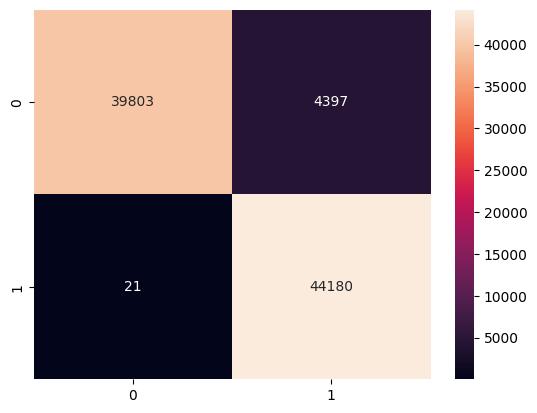

In [26]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')